In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from core.data import load_from_kaggle


c:\Users\Major\Desktop\Weiterbildung Daten Anlayst\DPP\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_link = "vipullrathod/fish-market" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

100%|██████████| 2.38k/2.38k [00:00<00:00, 3.49MB/s]

Extracting files...
Loading dataset from C:\Users\Major\.cache\kagglehub\datasets\vipullrathod\fish-market\versions\1 to ../data/raw\fish-market
Moving file: C:\Users\Major\.cache\kagglehub\datasets\vipullrathod\fish-market\versions\1\Fish.csv to c:\Users\Major\Desktop\Weiterbildung Daten Anlayst\DPP\notebooks\../data/raw\fish-market
Files moved to '../data/raw\fish-market' directory.


In [3]:
files

['Fish.csv']

In [4]:
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2).T,
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(159, 7)

'Description'

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.33,357.98,0.00,120.00,273.00,650.00,1650.00
Length1,159.0,26.25,10.00,7.50,19.05,25.20,32.70,59.00
Length2,159.0,28.42,10.72,8.40,21.00,27.30,35.50,63.40
Length3,159.0,31.23,11.61,8.80,23.15,29.40,39.65,68.00
Height,159.0,8.97,4.29,1.73,5.94,7.79,12.37,18.96
Width,159.0,4.42,1.69,1.05,3.39,4.25,5.58,8.14


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
Species,object,0,7,"[Perch, Roach, Perch]"
Weight,float64,0,101,"[7.0, 900.0, 197.0]"
Length1,float64,0,116,"[25.9, 40.0, 19.3]"
Length2,float64,0,93,"[22.5, 51.7, 13.0]"
Length3,float64,0,124,"[23.5, 39.7, 43.5]"
Height,float64,0,154,"[6.9153, 5.9364, 2.8728]"
Width,float64,0,152,"[5.134, 3.977, 6.1984]"


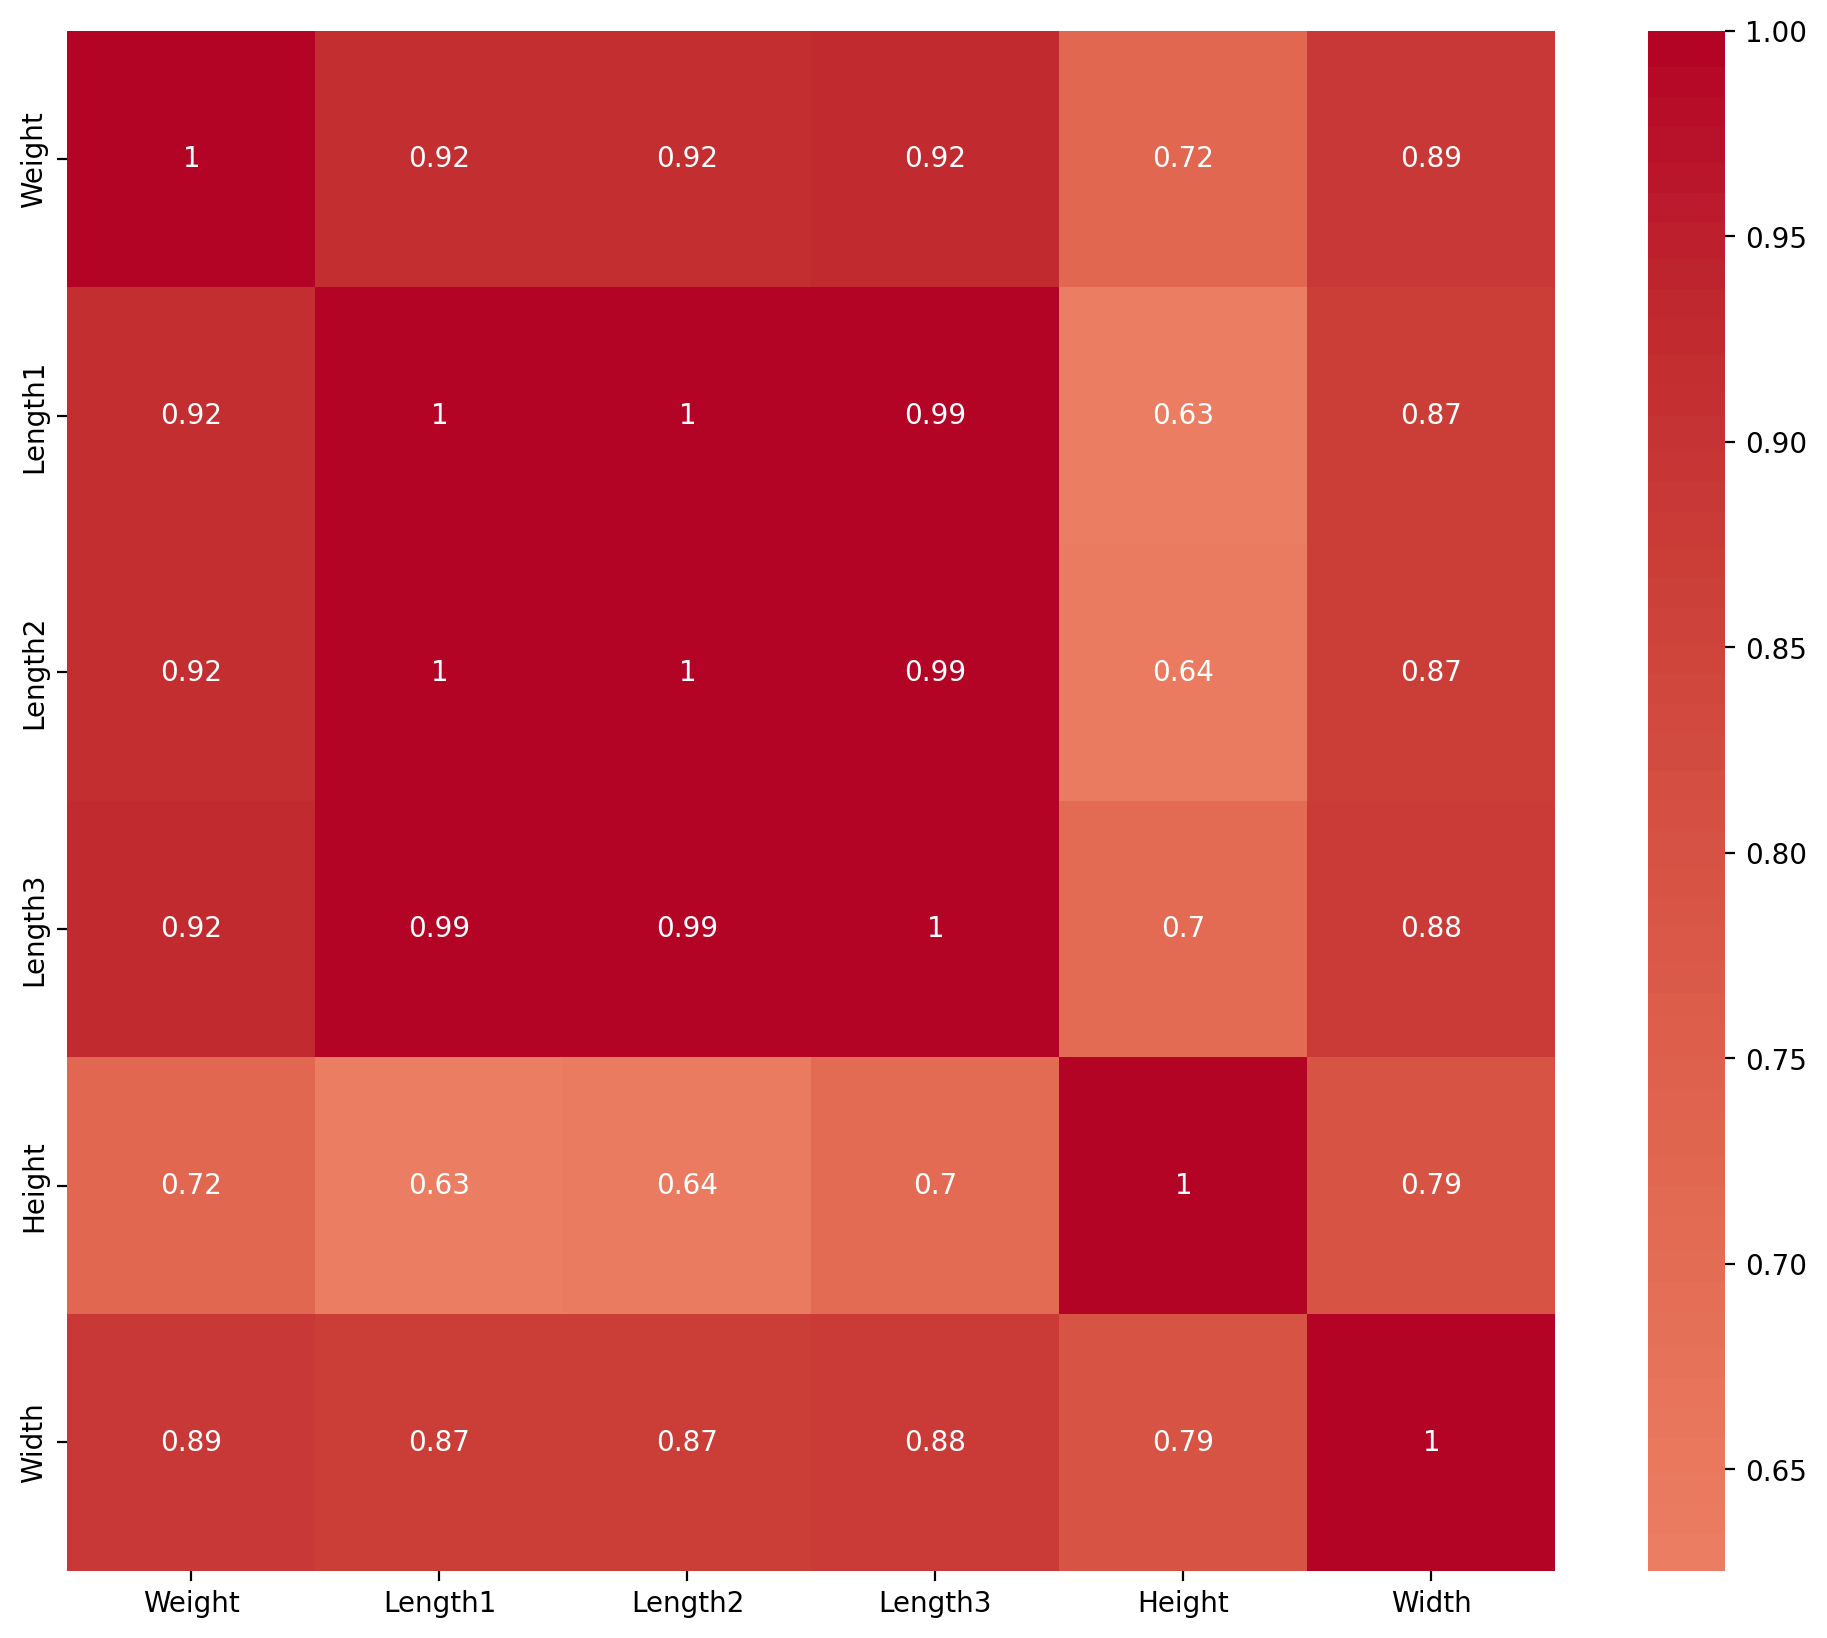

In [6]:
fig, ax = plt.subplots(figsize=(12, 10), dpi=200)

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, ax=ax);